Problem 1.17)
A particle is represented at time $t=0$ by the wave function $$\psi(x,0)= \left\{\begin{array}{l l} A(a^2-x^2),& if -a<=x<=a\\ 0,&otherwise;\end{array}\right.$$

1. Determine the normalization constant $A$.
2. What is the expectation value of $x$ (at time $t=0$)
3. What is the expectation value of $p$ (at time $t=0$)? (note that you cannot get it from $p=md\langle x\rangle/dt$. Why not?)
4. FInd the expectation value of $x^2$.
5. Find the expectation value of $p^2$.
6. Find the uncertainty in $x$ ($\sigma x$)


In [2]:
import sympy as sp
sp.init_printing()
a, A = sp.symbols('a A', real=True, positive=True)
x = sp.symbols('x', real=True)
psi = A*(a**2-x**2)
psi


In [3]:
psisq=psi**2
psisq

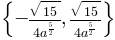

In [4]:
norm = sp.Eq(1, sp.integrate(psisq, (x, -a, a)))
sp.solveset(norm, A)

##Here is the normalization function. I solve for A and output.
##i only need to integrate from -a to a because the probability of the particle existing outside of this interval is 0.

In [5]:
psi = psi.subs(A, next(iter(sp.solveset(norm, A))))
psi

##take the solution for A and substitute into psi

In [6]:
expx = sp.integrate(x*psisq, (x, -a, a))
expx

In [7]:
expxsq = sp.integrate(x**2*psisq, (x, -a, a))
expxsq = expxsq.subs(A, next(iter(sp.solveset(norm, A))))
expxsq

##because i only substituted my answer for A into psi, i need to substitute again for psi squared

In [13]:
from sympy.physics.quantum.constants import hbar
expp = sp.integrate(sp.conjugate(psi)*hbar/sp.I*sp.diff(psi, x), (x, -a, a))
expp

In [14]:
exppsq = sp.integrate(sp.conjugate(psi)*hbar**2/sp.I**2*sp.diff(psi, x, 2), (x, -a, a))
exppsq

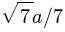

In [10]:
sigmax = sp.sqrt(expxsq-expx**2)
sigmax

In [15]:
sigmap = sp.sqrt(exppsq-expp**2)
sigmap

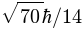

In [16]:
sigmax * sigmap

Since $70>49$, $sqrt(70)>7$ and thus $sqrt(70)/14 > 1/2$, so the uncertainty principle holds